In [49]:
import librosa # 음원 데이터 분석 라이브러리 
import librosa.display as dsp
from IPython.display import Audio # 음원을 파이썬 작업환경에서 띄우는 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import IPython.display as ipd

In [50]:
# path = '/content/drive/MyDrive/2. Study/Audio_Study/train/01/'
# sample = os.listdir(path)

# # 데이터 프레임 생성
# train = pd.DataFrame(sample, columns = ['file_name'])
# # label 생성
# train['label'] = None
# for i in range(len(train)):
#   train['label'][i] = train['file_name'][i][0]  

# train['label'] = train['label'].astype(int)
# train

,file_name,label
0,0_01_33.wav,0
1,0_01_15.wav,0
2,0_01_1.wav,0
3,0_01_23.wav,0
4,0_01_18.wav,0
...,...,...
495,9_01_41.wav,9
496,9_01_28.wav,9
497,9_01_48.wav,9
498,9_01_9.wav,9


In [51]:
# y, sr = librosa.load(path + train['file_name'][0])

# print(y)
# print(len(y))
# print('sampling rate :', sr)
# print(f'Audio length: {len(y) / sr:.3f}') # 오디오 길이 = 음파 길이 / sampling_rate

[-8.57812047e-05 -1.33301539e-04 -1.15329894e-04 ... -1.00493350e-03
 -1.01940357e-03  0.00000000e+00]
13070
sampling rate : 22050
Audio length: 0.593


---
# 2D 음파 그래프
---

In [135]:
y, sr = librosa.load(librosa.ex('fishin'), duration=5, offset=10)

print(y)
print(len(y))
print('sampling rate :', sr)
print(f'Audio length: {len(y) / sr:.3f}') # 오디오 길이 = 음파 길이 / sampling_rate

Audio(data=y, rate=sr)

[ 0.00458631 -0.00723107 -0.01367033 ... -0.08069878 -0.08614073
 -0.10080548]
110250
sampling rate : 22050
Audio length: 5.000


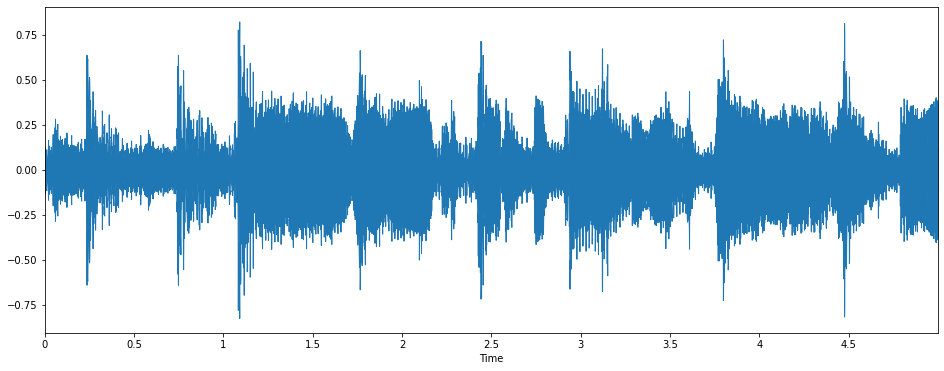

In [136]:
plt.figure(figsize = (16,6))
librosa.display.waveplot(y,sr)
plt.show()

---
# Fourier 변환
---

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


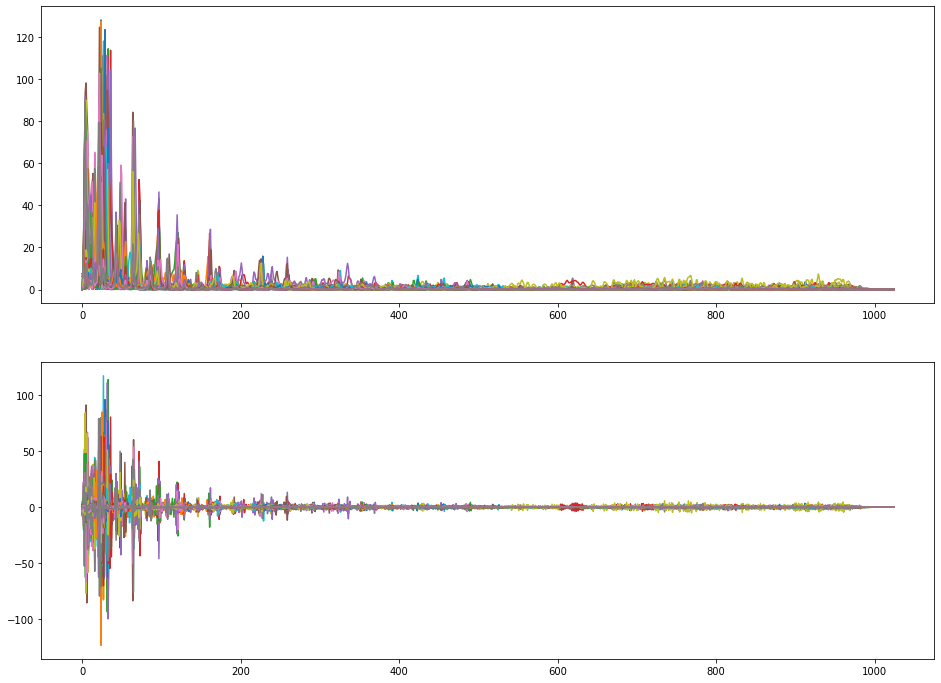

In [137]:
D = librosa.stft(y, n_fft = 2048, hop_length = 1024)
half_D = np.abs(librosa.stft(y, n_fft = 2048, hop_length = 1024))

fig, ax = plt.subplots(2,1, figsize = (16,12))
ax[0].plot(half_D)
ax[1].plot(D)

plt.show()

---
# Spectogram
---

- 소리나 파동을 시각화 하기 위한 도구

- 파형(waveform)과 스펙트럼(spectrum)의 특징이 조합되어 있음

- x축 = 시간

- y축 = 주파수

- 색깔 = 강도(세기)

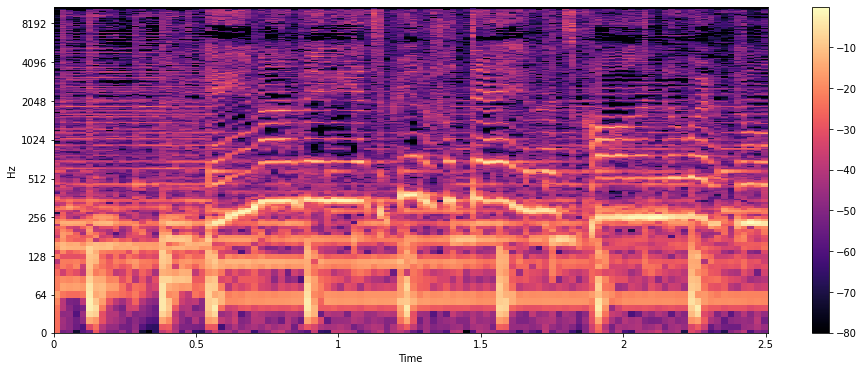

In [138]:
# amplitude(진폭)을 DB(데시벨)로 변환
spectogram = librosa.amplitude_to_db(half_D, ref = np.max) # D값이나 half_D값이나 동일한 값을 가짐 

plt.figure(figsize=(16,6))
librosa.display.specshow(spectogram,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

---
# Mel Spectogram
----

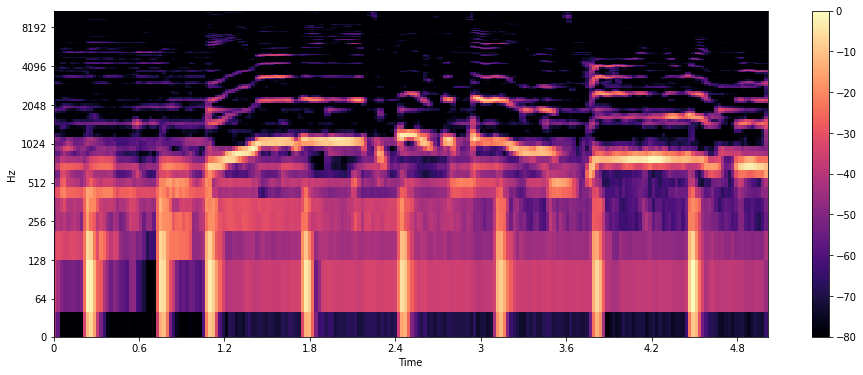

In [139]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

---
# Tempo(BPM)
---

In [140]:
tempo, _ = librosa.beat.beat_track(y,sr)
tempo

89.10290948275862

---
# Zero Crossing Rate
----

- 영교차율, 신호가 0을 지나는 즉, 신호의 부호가 바뀌는 비율

- 신호의 잡음 정도를 측정하는 것으로 해석 가능

In [141]:
zero_crossings = librosa.zero_crossings(y, pad=False)

print(zero_crossings)
print('이동한 횟수 :',sum(zero_crossings))

[False  True False ... False False False]
이동한 횟수 : 7013


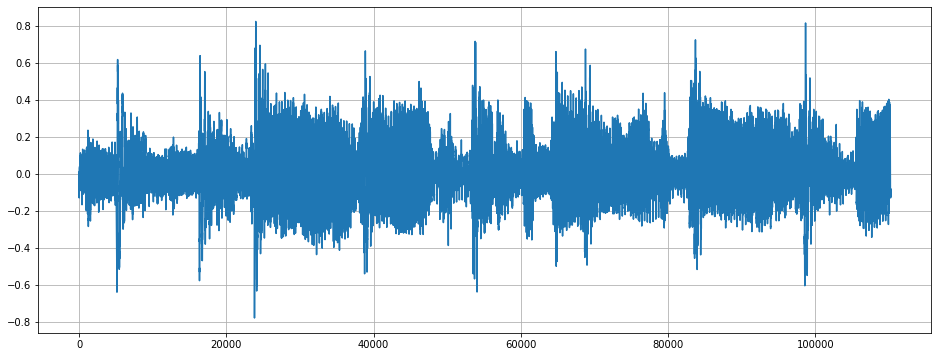

In [142]:
plt.figure(figsize = (16,6))
plt.plot(y)
plt.grid()
plt.show()

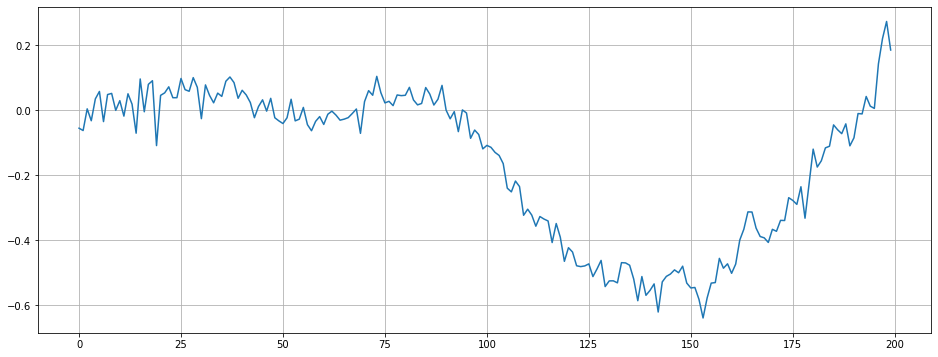

In [143]:
plt.figure(figsize = (16,6))
plt.plot(y[5000:5200])
plt.grid()
plt.show()

In [144]:
zero_crossings = librosa.zero_crossings(y[5000:5200], pad=False) #5000 ~ 5200 사이 zero crossings 
print(sum(zero_crossings))

33


---
# Harmonic and Percussive Components
----

- Harmonic(고조파) : 원천주파수(Fundamental Frequency)의 배수 주파수 성분  
  ex) 1.2GHz의 고조파는 2.4GHz, 3.6GHz 등

- librosa.effects.harmonic = 오디오 시계열에서 고조파 요소 추출 

- librosa.effects.percussive = 오디오 시계열에서 타악기 요소 추출 

In [94]:
D = librosa.stft(y)

D_harm, D_perc = librosa.decompose.hpss(D)

In [95]:
trans_D = librosa.amplitude_to_db(np.abs(D), ref = np.max(np.abs(D)))

trans_D_harm = librosa.amplitude_to_db(np.abs(D_harm), ref = np.max(np.abs(D_harm)))

trans_D_perc = librosa.amplitude_to_db(np.abs(D_perc), ref = np.max(np.abs(D_perc)))

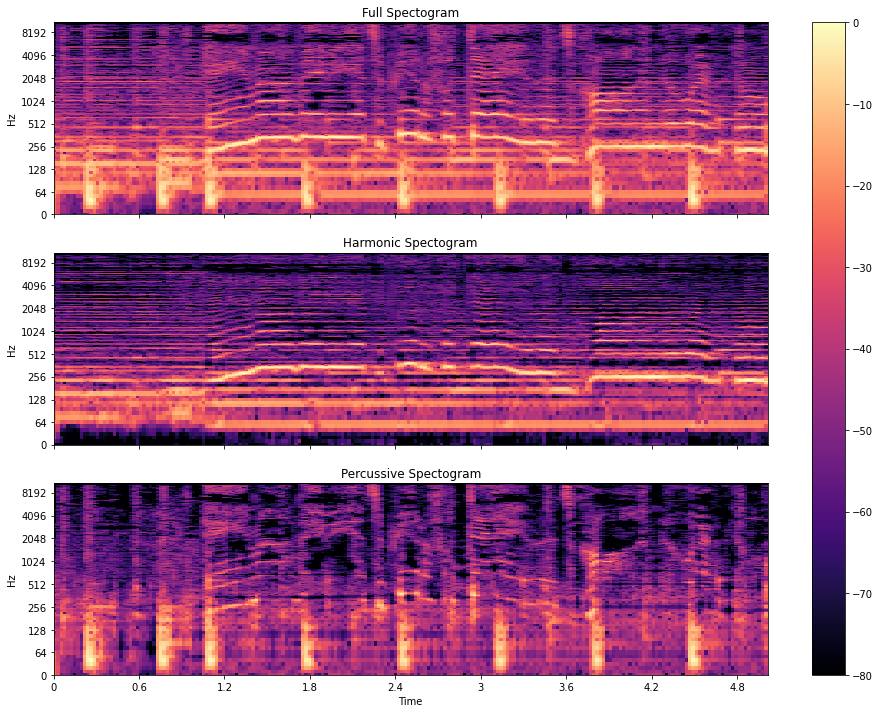

In [101]:
fig, ax = plt.subplots(3,1, figsize = (16,12))

librosa.display.specshow(trans_D, sr=sr,hop_length=512, x_axis='time',y_axis='log', ax = ax[0])
ax[0].set_title('Full Spectogram')
ax[0].label_outer()

librosa.display.specshow(trans_D_harm, sr=sr,hop_length=512, x_axis='time',y_axis='log', ax = ax[1])
ax[1].set_title('Harmonic Spectogram')
ax[1].label_outer()

img = librosa.display.specshow(trans_D_perc, sr=sr,hop_length=512, x_axis='time',y_axis='log', ax = ax[2])
ax[2].set_title('Percussive Spectogram')
ax[2].label_outer()

fig.colorbar(img, ax=ax)

In [102]:
# harmonic값 분리
y_harmonic = librosa.istft(D_harm, length=len(y))
Audio(data=y_harmonic, rate=sr)

In [103]:
# percussive값 분리
y_percussive = librosa.istft(D_perc, length=len(y))
Audio(data=y_percussive, rate=sr)

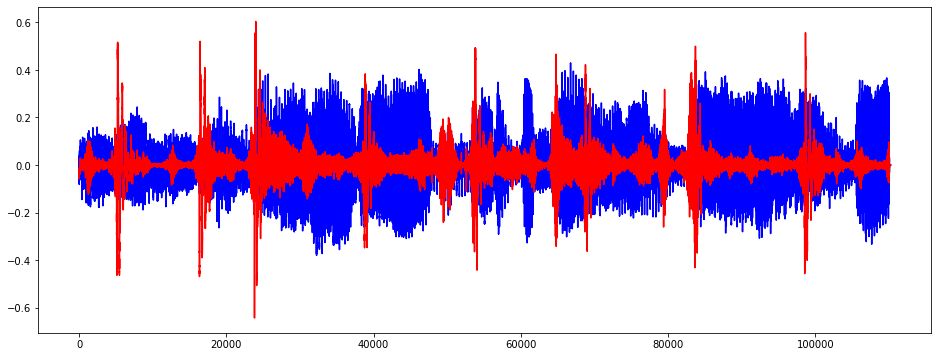

In [104]:
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16,6))
plt.plot(y_harm, color='b') # 화음
plt.plot(y_perc, color='r') # 타악기 소리
plt.show()

---
# Spectral Centroid
---

- 주파수로 표현했을 때, 가중평균을 계산해 소리의 무게중심을 알려주는 지표


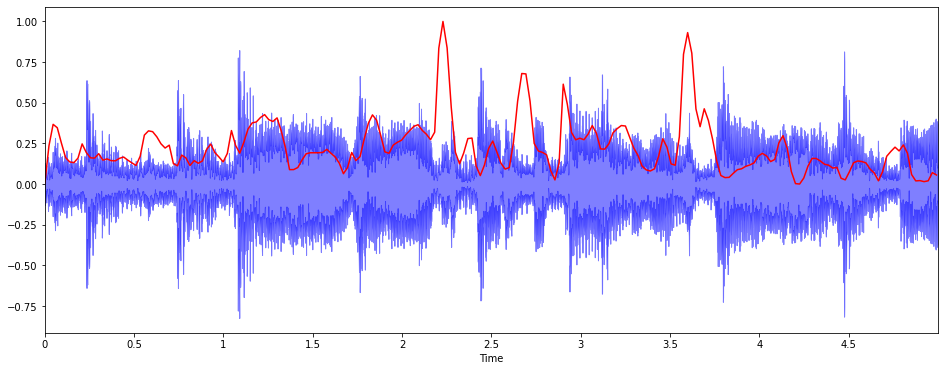

In [125]:
centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

frame = range(len(centroids))

t = librosa.frames_to_time(frame)

plt.figure(figsize =(16,6))
librosa.display.waveplot(y, sr, alpha = 0.5, color = 'b')
import sklearn 
scale_centroids = sklearn.preprocessing.minmax_scale(centroids, axis = 0)
plt.plot(t, scale_centroids, color = 'r')
plt.show()

---
# Spectral Rolloff
---

- 신호 모양 측정 
- 총 스펙트럴 에너지 중 85%이하의 낮은 주파수에 얼마나 많이 집중 되어 있는지 


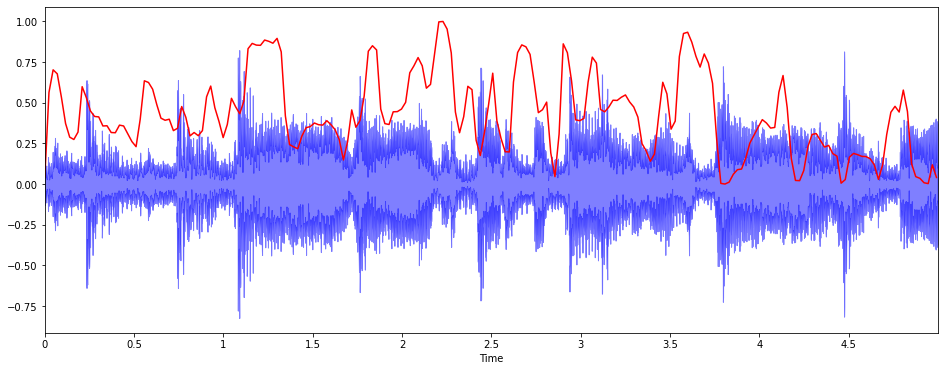

In [129]:
rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

scale_rolloff = sklearn.preprocessing.minmax_scale(rolloff, axis = 0)

plt.figure(figsize=(16,6))
librosa.display.waveplot(y,sr=sr,alpha=0.5,color='b')
plt.plot(t, scale_rolloff,color='r')
plt.show()

---
# Mel-Frequency Cepstral Coefficient(MFCC)
---

[MFCC 관련 블로그](https://brightwon.tistory.com/11)

- 오디오 신호에서 추출할 수 있는 feature 

- 소리의 고유한 특징을 나타내는 수치

- Mel Spectrum에서 Cepstral 분석을 통해 추출된 값 

- 주로 음성인식, 화자 인식, 음성 합성, 음악 장르 분류 등에 사용

mean: -0.29
var: 2068.53


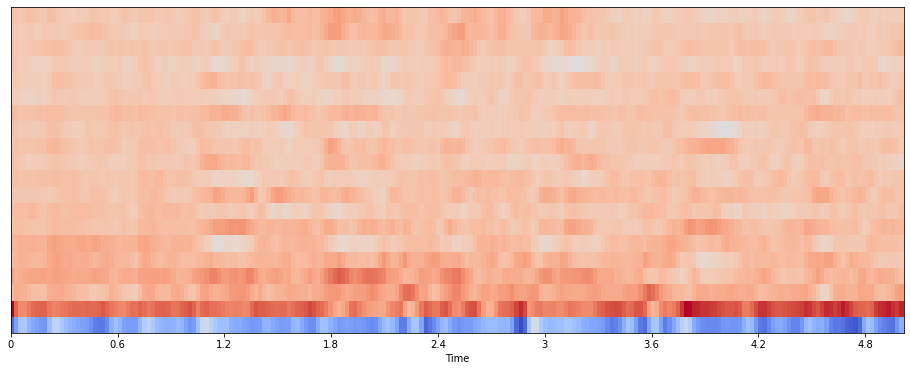

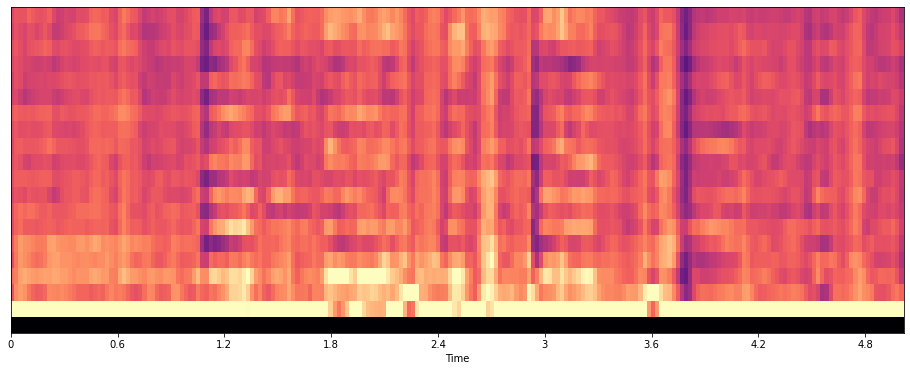

In [131]:
mfccs = librosa.feature.mfcc(y, sr=sr)

scale_mfcc = sklearn.preprocessing.minmax_scale(mfccs, axis = 0)


print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

# 정규화를 하지 않은 값
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

# 정규화를 한 값 mfcc를 정규화 하지 않는 다면 너무 낮은 값이 있어서 특징을 볼 수 없음
plt.figure(figsize=(16,6))
librosa.display.specshow(scale_mfcc,sr=sr, x_axis='time')
plt.show()

---
# Chroma Frequencies
----

- 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반 

- 모든 스펙트럼을 12개의 옥타브로 표현

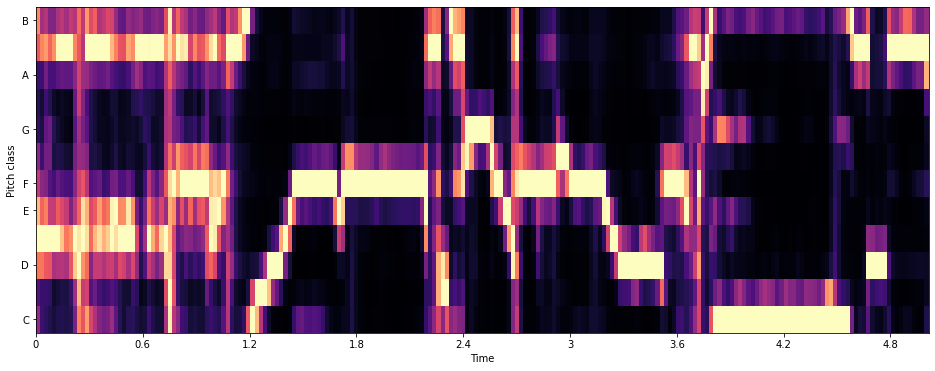

In [132]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()